In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.1.3 installed at /home/cony/anaconda3/lib/python3.7/site-packages/camb


# Obteniendo los valores de los parámetros

In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.060, omch2=0.100, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(5050, lens_potential_accuracy=0);

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)

In [4]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(5101, 4)


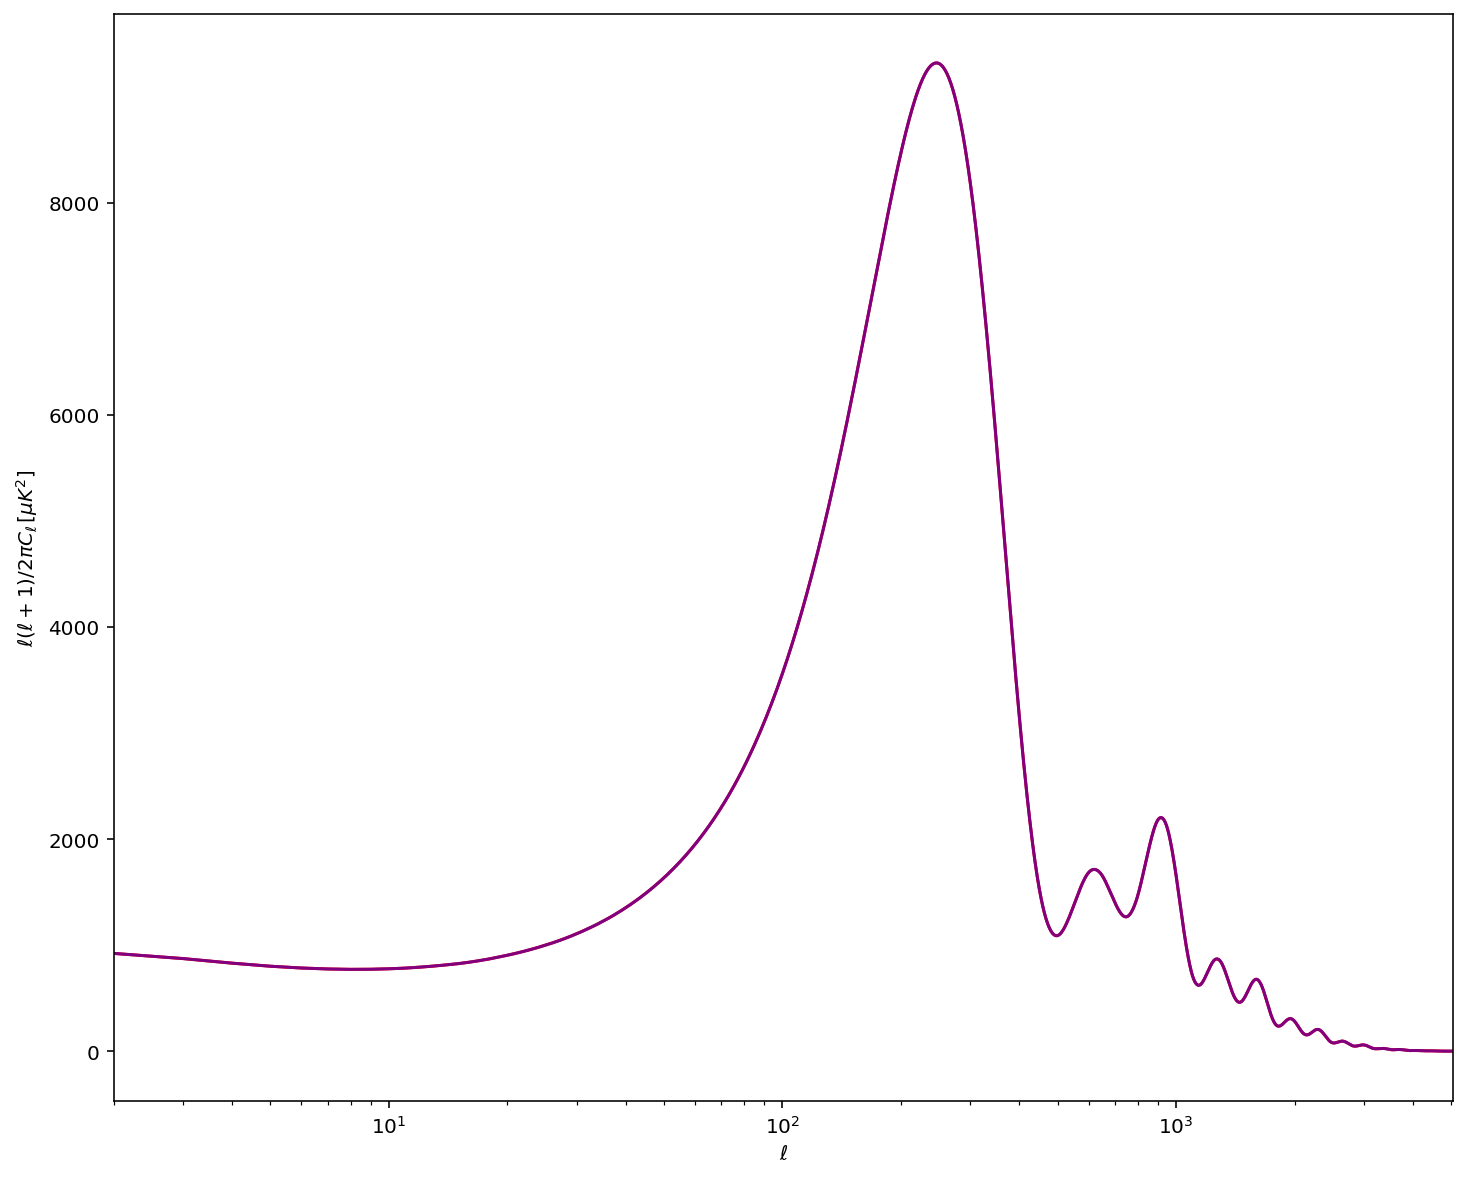

<Figure size 432x288 with 0 Axes>

In [5]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])

fig, ax = plt.subplots(1,1, figsize=(12,10), squeeze=False)
#plt.xscale('log')
#ax[0,0].plot(ls,totCL[:,0], color='k')
plt.xscale('log')
ax[0,0].plot(ls, unlensedCL[:,0], color='r')
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
plt.savefig('spectrum_params.png')


#plt.figure(figsize=(8,6))
plt.plot(data['x'], data['y'],color="purple")
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

plt.show()
plt.savefig('spectrum_comparacion.png')